In [46]:
#Вычислительная математика. Лабораторная работа 1: Численное дифференцирование

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math as m
%matplotlib inline

In [2]:
#Задаем функцию и ее производные, которые мы будем использовать
def f(x:float):
    return np.sin(x)
    
def first_derivative(x:float):
    return np.cos(x)
    
def second_derivative(x:float):
    return -np.sin(x)
#Задаем шаг разбиения и его границы
step = 0.5
left_bound = 0.01
right_bound = 5.01

In [3]:
args = np.arange(left_bound, right_bound + 0.0001, step)
points = np.sin(args)
small_steps = np.arange(left_bound, right_bound + 0.0001, 0.005)

In [4]:
#Первая производная с первым порядком
def first_der_first_order(points:list, step:float):
    result = []
    for i in range(len(points) - 1): 
        result.append((points[i + 1] - points[i]) / step)
    result.append(result[len(points) - 2])
    return result

In [5]:
#Первая производная с вторым порядком точности
def first_der_second_order_non_symmetrical(points:list, step:float):
    result = []
    
    for i in range(len(points) - 2): #все кроме правого конца
        f0 = points[i]
        f1 = points[i+1]
        f2 = points[i+2]
        der = ( -1.5*f0 + 2*f1 - 0.5*f2 ) / step
        result.append(der);
    
    for i in range(len(points)-2, len(points)): #правый конец
        f0 = points[i]
        f_1 = points[i-1]
        f_2 = points[i-2]
        der = (0.5 * f_2 - 2 * f_1 + 1.5 * f0) / step
        result.append(der)
    return result

In [6]:
#Первая производная с вторым порядком точности
def first_der_second_order(points:list, step:float):
    result = []
    n = len(points)
    
        
    for i in range(2): #левая граница
        f0 = points[i]
        f1 = points[i+1]
        f2 = points[i+2]
        der = ( -1.5 * f0 + 2 * f1 - 0.5 * f2 ) / step
        result.append(der);
    
    for i in range(2, n - 2): #все кроме первой и последней точки
        f0 = points[i]
        f1 = points[i + 1]
        f_1 = points[i - 1]
        der = (-0.5 * f_1 + 0.5 * f1) / step
        result.append(der);

    
    for i in range(n - 2, n, 1): #правая граница
        f0 = points[i]
        f_1 = points[i-1]
        f_2 = points[i-2]
        der = (0.5 * f_2 - 2 * f_1 + 1.5 * f0) / step
        result.append(der)
        
    return result

<function matplotlib.pyplot.show(close=None, block=None)>

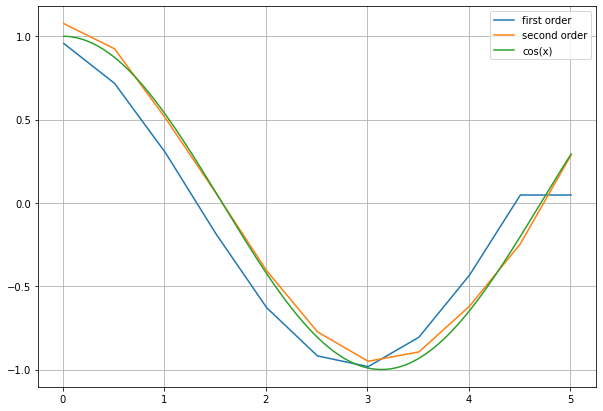

In [7]:
#сравнение точности
plt.figure(figsize=(10, 7))

plt.plot(args, first_der_first_order(points, step), label = 'first order')
plt.plot(args, first_der_second_order(points, step), label = 'second order')
plt.plot(small_steps, np.cos(small_steps), label = 'cos(x)')
plt.legend()
plt.grid()

plt.show

In [8]:
#Вторая производная с первым порядком точности
def second_der_first_order(points:list, step:float):
    result = []
    n = len(points)
    
    for i in range(n - 2): #все остальное
        f0 = points[i]
        f1 = points[i + 1]
        f2 = points[i + 2]
        der = (f0 - 2 * f1 + f2) / (step * step)
        result.append(der)
    

    for i in range(n - 2, n, 1): #правый конец
        f0 = points[i]
        f_1 = points[i-1]
        f_2 = points[i-2]
        der = (f_2 - 2 * f_1 + f0) / (step * step)
        result.append(der)
    
    return result

In [9]:
#Вторая производная со вторым порядком точности
def second_der_second_order(points:list, step:float):
    result = []
    n = len(points)
    
    for i in range(3): #левая часть
        f0 = points[i]
        f1 = points[i+1]
        f2 = points[i+2]
        f3 = points[i+3]
        der = ( 2*f0 - 5 * f1 + 4 * f2 - f3 ) / (step * step)
        result.append(der)
        
    for i in range(3, n - 3):
        f0 = points[i]
        f_1 = points[i-1]
        f1 = points[i+1]
        der = (f_1 - 2 * f0 + f1) / (step * step)
        result.append(der)     

    for i in range(n-3, n, 1): #правая часть
        f0 = points[i]
        f_1 = points[i-1]
        f_2 = points[i-2]
        f_3 = points[i-3]
        der = (2 * f0 - 5*f_1 + 4*f_2 - f_3) / (step * step)
        result.append(der)
    
    return result

<function matplotlib.pyplot.show(close=None, block=None)>

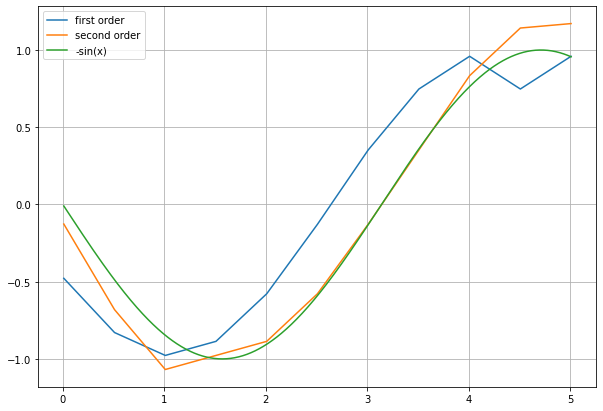

In [10]:
#сравнение точности
plt.figure(figsize=(10, 7))

plt.plot(args, second_der_first_order(points, step), label = 'first order')
plt.plot(args, second_der_second_order(points, step), label = 'second order')
plt.plot(small_steps, -1 * np.sin(small_steps), label = '-sin(x)')
plt.legend()
plt.grid()

plt.show

In [11]:
#Пришло время посмотреть как зависят погрешности от шага сетки.
#Для этого сгенерируем сетки с разными шагами.

dif_step = 0.001
start_step = 0.001
end_step = 0.1

In [12]:
def deviations_for_graph(f, diff, start_step:float, end_step:float, dif_step:float, left_bound:float, right_bound:float):
    result = [[], []]
    
    for i in np.arange(start_step, end_step, dif_step):
        args = np.arange(left_bound, right_bound, i)
        points = np.sin(args)
        der = f(args)
        dys = np.array(diff(points, i))
        result[0].append(i)
        result[1].append(np.max((der - dys)[:-1]))
        
    return np.array(result[0]), np.array(result[1])

In [13]:
#Функция для отрисовки


def my_plot():
    diff11 = deviations_for_graph(first_derivative, first_der_first_order, start_step, end_step, dif_step, left_bound, right_bound)
    diff12 = deviations_for_graph(first_derivative, first_der_second_order, start_step, end_step, dif_step, left_bound, right_bound)
    diff21 = deviations_for_graph(second_derivative, second_der_first_order, start_step, end_step, dif_step, left_bound, right_bound)
    diff22 = deviations_for_graph(second_derivative, second_der_second_order, start_step, end_step, dif_step, left_bound, right_bound)
    
    plt.plot(diff11[0], diff11[1], label = "1 der 1 order")
    plt.plot(diff12[0], diff12[1], label = "1 der 2 order")
    plt.plot(diff21[0], diff21[1], label = "2 der 1 order")
    plt.plot(diff22[0], diff22[1], label = "2 der 2 order")
    plt.xlabel('step')
    plt.ylabel('deviation')
    plt.legend()
    plt.grid()
    
    plt.show()


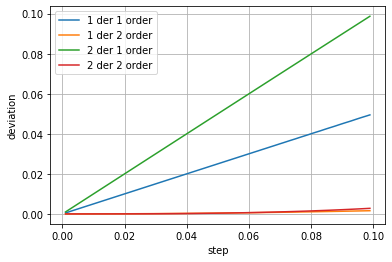

In [14]:
my_plot()

In [15]:
def log_deviations_for_graph(f, diff, start_step:float, end_step:float, dif_step:float, left_bound:float, right_bound:float):
    x, y = deviations_for_graph(f, diff, start_step, end_step, dif_step, left_bound, right_bound)
    return np.log(x), np.log(y)

In [16]:
def my_log_plot():
    diff11 = log_deviations_for_graph(first_derivative, first_der_first_order, start_step, end_step, dif_step, left_bound, right_bound)
    diff12 = log_deviations_for_graph(first_derivative, first_der_second_order, start_step, end_step, dif_step, left_bound, right_bound)
    diff22 = log_deviations_for_graph(second_derivative, second_der_second_order, start_step, end_step, dif_step, left_bound, right_bound)
    
    plt.plot(diff11[0], diff11[1], label = "1 der 1 order")
    plt.plot(diff12[0], diff12[1], label = "1 der 2 order")
    plt.plot(diff22[0], diff22[1], label = "2 der 2 order")
    plt.xlabel('log(step)')
    plt.ylabel('log(deviation)')
    plt.legend()
    plt.grid()
    
    plt.show()


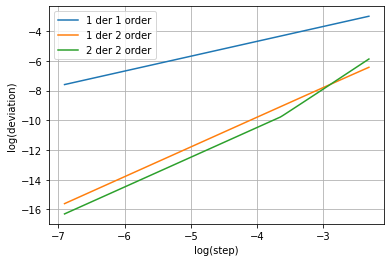

In [17]:
my_log_plot()